# Visualization Exercises

1. Data Pre-Processing:
    * Using the `missingno` package, sort the data `marketing.csv` by completeness of each row of the data, from most incomplete to most complete. How complete is the emptiest row of data? From the visual, are there any columns of data that can be omitted? If so, which ones?

2. Plotting with `matplotlib`:
    * Using `matplotlib`, create a figure with 4 subplots of histograms from 4 columns of the same data from problem 1. 

3. Plotting with `seaborn`:
    * Using the package, generate 6 jointplots that compare the histograms from the previous exercise. With these plots, 3 of them should be done with scatterplots, the other plots should be done with the hexbin method of plotting.
    * Plot a pair plot of the entire dataset.
    
4. `pygal` visualization:
    * Using the package, graph a line chart with all of the `GDP` data provided below.
    
5. (Optional Practice) Fun visualization with `matplotlib`:
    * Generate a unique graph comic with the package and the `xkcd` style.

For more information regarding the marketing dataset, go to the following link https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/marketing.info.txt.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import missingno as msno


Problem 1:

In [3]:

data = pd.read_csv("marketing.csv")

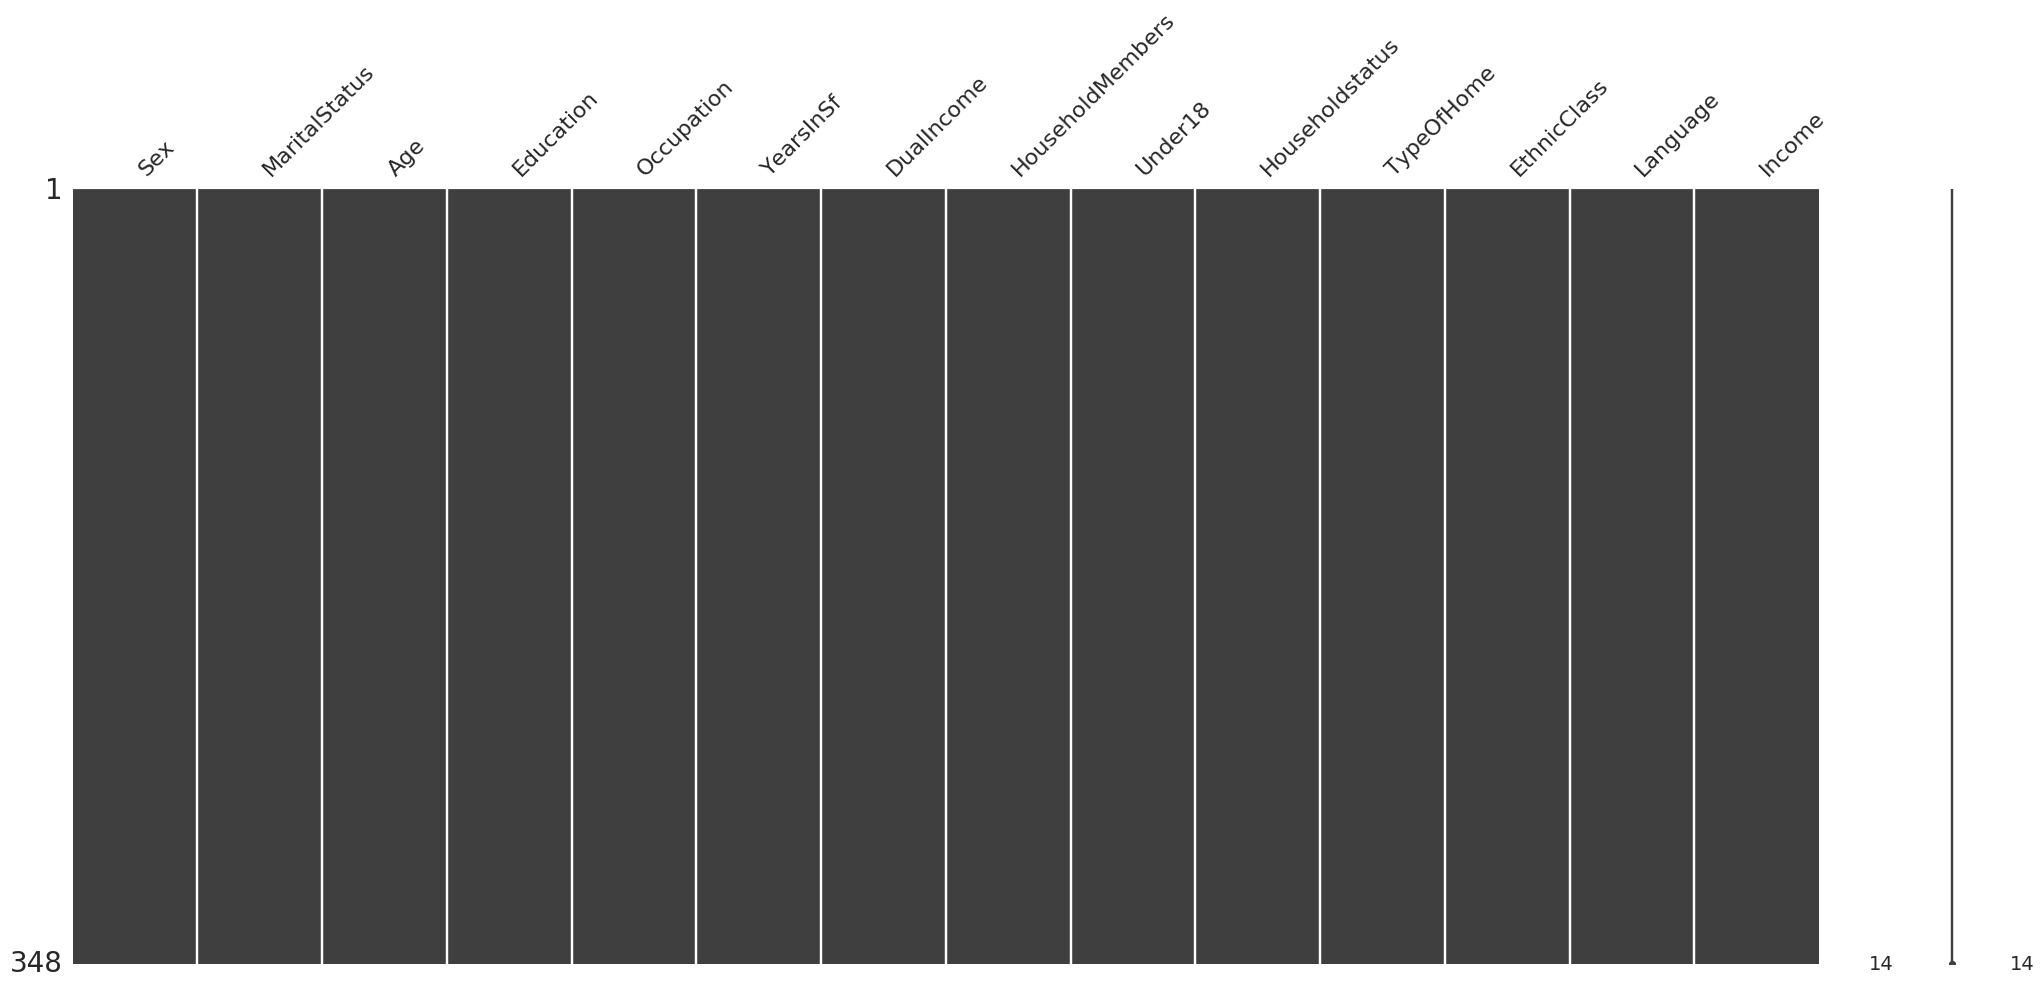

In [4]:
sorted_data = msno.nullity_sort(data, sort='descending')
msno.matrix(sorted_data)

All of the rows of data seem fairly complete, and there is no obvious collumn that can be excluded due to nullities.

Problem 2:

In [8]:
y = data['Income']
xone = data['Income']
xtwo = data['Sex']
xthree = data['Age']
xfour = data['DualIncome']

In [6]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.figure(1)


plt.subplot(221)
plt.hist(xone, y)
plt.title('Education')
plt.grid(True)


plt.subplot(222)
plt.plot(xtwo, y)
plt.title('Sex')
plt.grid(True)


plt.subplot(223)
plt.plot(xthree, y)
plt.title('Age')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(xfour, y)
plt.title('Household Status')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

TypeError: cannot perform reduce with flexible type

Problem 4:

In [6]:
from IPython.display import SVG, HTML
import pygal
import lxml
#import cairosvg
import tinycss
import cssselect

# Year
year = pd.Series([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
1965,1966, 1967,1968,1969, 1970,1971,1972,1973,1974,1975, 1976,1977,1978,1979,1980,1981,1982,1983]) 

# USA GDP
usa = pd.Series([4.470303, 4.734335, 4.826502, 4.981746, 4.79081, 5.032075, 5.052481, 5.056624, 4.94959, 
5.154055, 5.160474, 5.160474, 5.193368, 5.401093, 5.540345, 5.743346, 6.013005, 6.400414, 6.620659, 
6.725011, 6.637999, 6.744059, 7.055923, 7.368125, 7.207006, 7.06805, 7.396588, 7.697297, 7.954296, 
8.10547, 7.974804, 8.164851, 7.843721, 7.999103])

# UK GDP
uk = pd.Series([1.033571, 1.060015, 1.104598, 1.152221, 1.191948, 1.227778, 1.242018, 1.260623, 1.257567, 1.355527, 
1.38902, 1.38902, 1.38912, 1.43379, 1.495286, 1.520258, 1.54362, 1.574283, 1.632249, 1.649105, 1.682107, 1.720178, 
1.756078, 1.8913, 1.862496, 1.844774, 1.912678, 1.938803, 1.999929, 2.047829, 2.000467, 1.975381, 2.013859, 2.07901])

# Canada GDP
canada = pd.Series([3.651109, 3.734242, 3.932222, 4.019939, 3.860731, 4.118041, 4.364902, 4.339562, 4.312412, 
4.382468, 4.388408, 4.433521, 4.645716, 4.812286, 5.024269, 5.267964, 5.534567, 5.622673, 5.845109, 
6.062678, 6.135059, 6.480482, 6.786958, 7.215567, 7.383474, 7.337132, 7.652321, 7.765014, 7.960485, 
8.179226, 8.160562, 8.382785, 7.923615, 8.065477])

In [7]:
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [12]:
line_chart = pygal.Line()
line_chart.title = 'GDP Data'
line_chart.x_labels = map(str, year)
line_chart.add('USA', usa)
line_chart.add('UK',  uk)
line_chart.add('Canada',  canada)
HTML(html_pygal.format(pygal_render=line_chart.render()))